<center><img src="Data/HERE.gif" alt="Wait For It !!!"></center>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing Libraries</h1>

In [16]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.ensemble import IsolationForest

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> Loading Data</h1>

In [2]:
df = pd.read_csv('Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> EDA</h1>

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> Null Values</h1>

In [6]:
null_df = df.isnull().sum()[df.isnull().sum() > 0].sort_values().to_frame().rename(columns={0: "Total Missing values"})
null_df["% of Missing Values"] = round(null_df["Total Missing values"]/len(df)*100, 2)
null_df["Feature Data Type"] = df[null_df.index.tolist()].dtypes

null_df

,Total Missing values,% of Missing Values,Feature Data Type


In [7]:
df.duplicated().sum()

1081

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


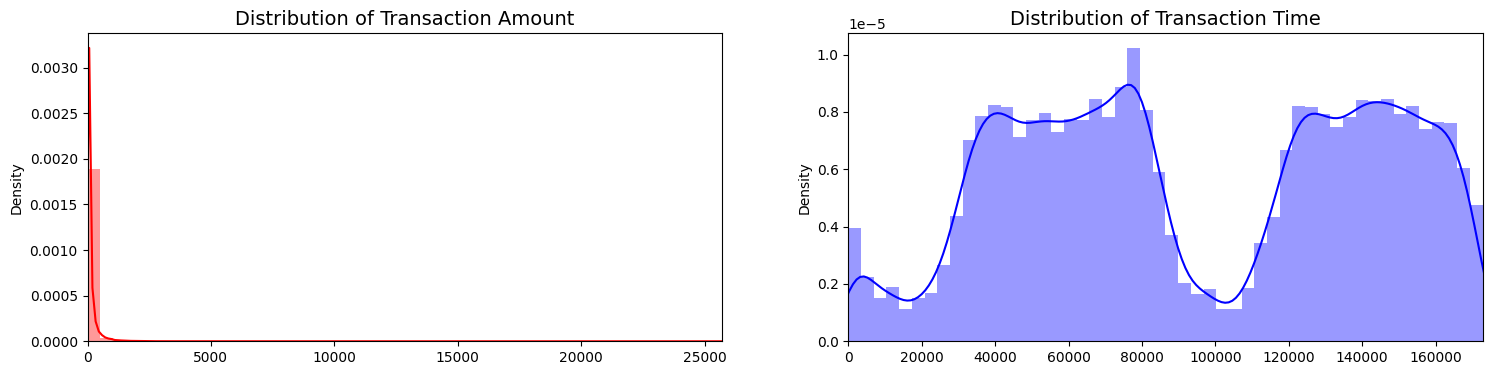

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

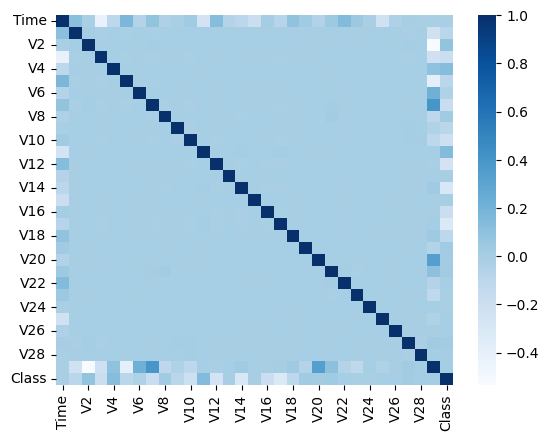

In [11]:
dataplot = sns.heatmap(df.corr(), cmap="Blues")
plt.show()

<Axes: xlabel='Class', ylabel='count'>

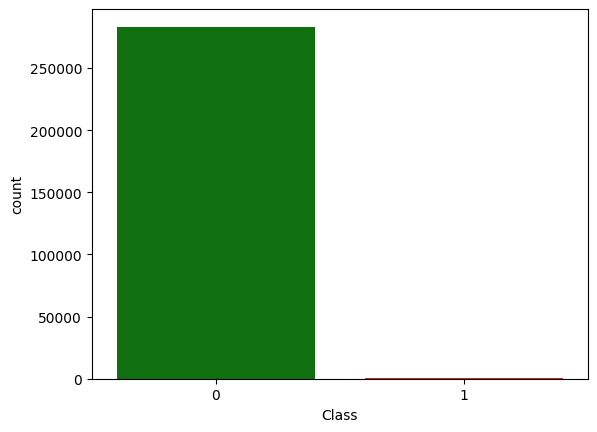

In [12]:
sns.countplot(x='Class', data=df ,palette=['g','r'])

<Axes: xlabel='Class', ylabel='count'>

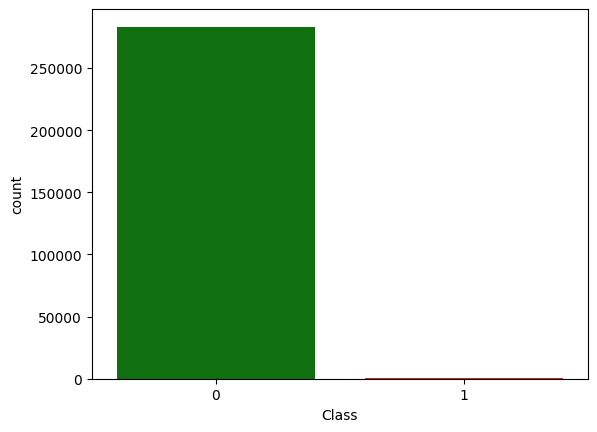

In [14]:
sns.countplot(x='Class', data=df , palette=['g','r'])

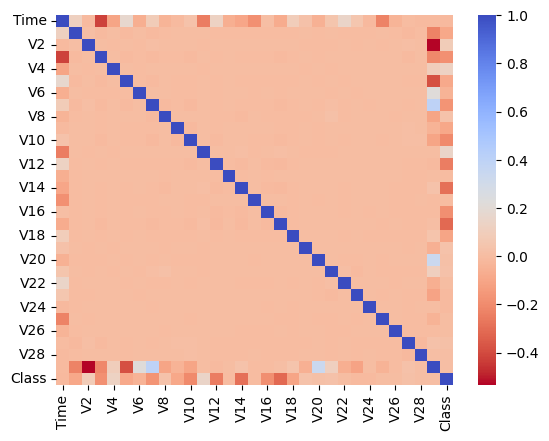

In [15]:
sub_sample_corr = df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size': 20})
plt.show()

In [ ]:
print('Not Frauds', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')
df['Class'].value_counts()

Not Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Class
0    283253
1       473
Name: count, dtype: int64

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> Data Spliting </h1>

In [19]:
X = df.drop(columns='Class', axis=1)
Y = df['Class']

Here's the reformatted text with improved clarity and structure:

---

### Addressing Class Imbalance in Credit Card Fraud Detection

In our credit card classification model, we face a significant **class imbalance** problem. The majority class (Not Fraud) dominates the dataset, while the minority class (Fraud) is quite rare. This imbalance can lead to poor model performance, particularly in detecting fraud cases, as most models tend to predict the majority class more frequently.

To tackle this issue, we have implemented several strategies:

### 1. Resampling Techniques

- **Oversampling the Minority Class (Fraud cases)**:
   - Increase the number of samples in the minority class (Fraud) by duplicating existing samples or generating synthetic ones.
   - **SMOTE (Synthetic Minority Over-sampling Technique)**: SMOTE creates synthetic samples for the minority class by interpolating between existing minority class samples.
     ```python
     from imblearn.over_sampling import SMOTE
     
     smote = SMOTE(random_state=42)
     X_resampled, y_resampled = smote.fit_resample(X, y)
     ```

- **Undersampling the Majority Class (Not Frauds)**:
   - Decrease the number of samples in the majority class to balance the dataset.
   - **Random Undersampling**: Randomly removes samples from the majority class.
     ```python
     from imblearn.under_sampling import RandomUnderSampler
     
     rus = RandomUnderSampler(random_state=42)
     X_resampled, y_resampled = rus.fit_resample(X, y)
     ```

- **Combination of SMOTE and Undersampling**:
   - Combine SMOTE (to increase minority class samples) with undersampling of the majority class to achieve a balanced dataset.
     ```python
     from imblearn.combine import SMOTEENN
     
     smote_enn = SMOTEENN(random_state=42)
     X_resampled, y_resampled = smote_enn.fit_resample(X, y)
     ```

### 2. Using Class Weights in Models

Many classification algorithms allow us to assign different weights to the classes, helping the model focus more on the minority class (Fraud cases).

- For **Random Forest** or **Logistic Regression**, set `class_weight='balanced'`.

- For **XGBoost**, set `scale_pos_weight` to the ratio of negative to positive samples.

### 3. Using Anomaly Detection Algorithms

Given the rarity of fraudulent transactions, treating this problem as an anomaly detection task can be effective. Models such as **Isolation Forest**, **One-Class SVM**, or **Autoencoders** can be employed to detect anomalies (fraudulent transactions) in the dataset.

### 4. Ensemble Models

Utilizing ensemble models that are robust against class imbalance, such as **XGBoost**, **LightGBM**, or **CatBoost**, can also be beneficial. Tuning regularization parameters can help these models handle imbalance effectively.

### Conclusion

By employing **resampling techniques** and **class weighting**, we can focus more on the minority class (fraud detection) and improve the model's performance through these strategies.

--- 


In [20]:
# oversampling minority class & undersampling majority class
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, Y)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> Scaling Data </h1>

In [21]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> Modeling </h1>

In [22]:

# Define models, including Isolation Forest for anomaly detection
results = []
models = [
    ('Logistic Regression', LogisticRegression(class_weight='balanced')),
    ('SVC', SVC(kernel='poly', C=15, probability=True, class_weight='balanced')),
    ('KNN', KNeighborsClassifier(n_neighbors=25)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=80, class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(class_weight='balanced')),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100, learning_rate=0.1)),
    ('XGB', XGBClassifier(scale_pos_weight=(99.83 / 0.17))),  # Handling class imbalance
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, subsample=0.9)),
    ('Extra Trees', ExtraTreesClassifier(n_estimators=200, max_depth=12, bootstrap=False)),
    ('Isolation Forest', IsolationForest(contamination=0.0017))  # Anomaly detection
]

# Evaluate model function
def evaluate_model(model, model_name):
    if model_name == 'Isolation Forest':
        model.fit(X_train_scaled)  # Fit on the training set
        y_test_pred = model.predict(X_test_scaled)
        # Convert predictions: -1 (anomaly) or 1 (normal)
        y_test_pred = [1 if pred == -1 else 0 for pred in y_test_pred]  # Adjusting for binary classification
        
        precision = precision_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)
        auc_roc = 'N/A'  # AUC-ROC not applicable for Isolation Forest directly
    else:
        model.fit(X_train_scaled, y_train)
        y_test_pred = model.predict(X_test_scaled)
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
        
        precision = precision_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)
        auc_roc = roc_auc_score(y_test, y_test_prob) if y_test_prob is not None else 'N/A'

    results.append([model_name, precision, recall, f1, auc_roc])

# Evaluate all models
for model_name, model in models:
    evaluate_model(model, model_name)

# Create a DataFrame for classification results
classification_results_df = pd.DataFrame(results, columns=["Model", "Precision", "Recall", "F1-Score", "AUC-ROC"])
classification_results_df


,Model,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.991576,0.970325,0.980836,0.99731
1,SVC,0.998016,0.999415,0.998715,0.999832
2,KNN,0.992182,0.999978,0.996065,0.999741
3,Decision Tree,0.997532,0.999095,0.998313,0.998262
4,Random Forest,0.999746,0.999967,0.999857,0.999981
5,AdaBoost,0.986596,0.954445,0.970254,0.996444
6,XGB,0.999151,1.000000,0.999575,0.99999
7,Gradient Boosting,0.996393,0.993710,0.995049,0.999808
8,Extra Trees,0.998550,0.934725,0.965584,0.998209
9,Isolation Forest,0.969283,0.003134,0.006248,N/A



### Top Models:

- **XGBoost (XGB)**
- **Random Forest**
- **SVC**
- **KNN**:

The **best model** based on the results is the **XGB Boost** classifier

In [23]:
model = XGBClassifier(scale_pos_weight=(99.83 / 0.17))

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87125
           1       1.00      1.00      1.00     90616

    accuracy                           1.00    177741
   macro avg       1.00      1.00      1.00    177741
weighted avg       1.00      1.00      1.00    177741



In [24]:
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred
})

results_df.to_csv('actual_vs_predicted_comparison.csv', index=False)

results_df.head(10)

,Actual Values,Predicted Values
472975,1,1
65033,0,0
72087,0,0
497743,1,1
433485,1,1
280366,1,1
158579,0,0
366413,1,1
44135,0,0
330357,1,1


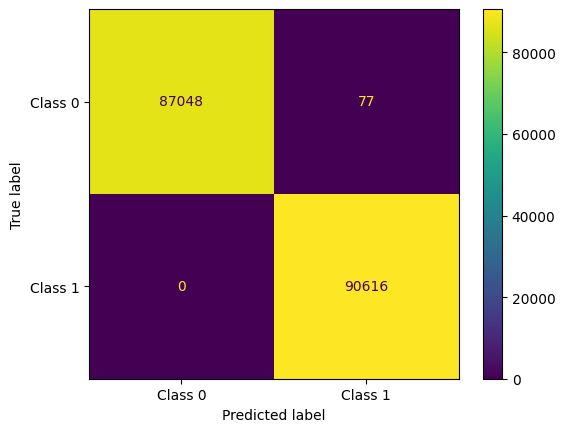

In [25]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.show()

<Axes: >

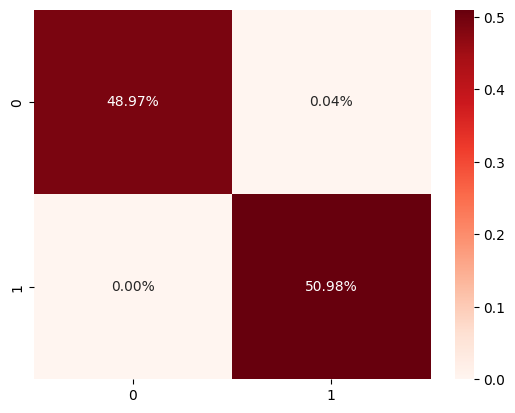

In [26]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap='Reds')

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> Cross Validiation </h1>

In [28]:
# models = [
#     ('Random Forest', RandomForestClassifier(class_weight='balanced')),
#     ('XGB', XGBClassifier(scale_pos_weight=99.83/0.17))
# ]

# def compare_models_cross_validation():
#     for model_name, model in models:
#         #apply 5-fold cross-validation
#         cv_score = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')

#         #calculate mean accuracy
#         mean_accuracy = sum(cv_score) / len(cv_score) * 100
#         mean_accuracy = round(mean_accuracy, 2)

#         print('Cross Validation accuracies for ', model_name, '=  ', cv_score)
#         print('Mean Accuracy % of the ', model_name, '=', mean_accuracy)
#         print('----------------------------------------------')

# compare_models_cross_validation()


<center><h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">So XGB Is the Best Model With Highest Accuracy Among All Models </h1></center>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> Saving </h1>

In [23]:
joblib.dump(model, 'Savings/XGB_model.pkl')
joblib.dump(scaler, 'Savings/scaler.pkl')
joblib.dump(smote_enn, 'Savings/smoteENN.pkl')

['smote.pkl']